               DateTime  Actual_PT08.S1(CO)  Predicted_PT08.S1(CO)  \
NaN 2004-03-10 19:00:00              1292.0            1289.687778   
NaN 2004-03-10 20:00:00              1402.0            1298.692352   
NaN 2004-03-10 21:00:00              1376.0            1342.252131   
NaN 2004-03-10 22:00:00              1272.0            1379.705476   
0.0 2004-03-10 23:00:00              1197.0            1274.191631   

     Actual_PT08.S2(NMHC)  Predicted_PT08.S2(NMHC)  Actual_PT08.S3(NOx)  \
NaN                   NaN                      NaN                  NaN   
NaN                 939.0               961.023838                  NaN   
NaN                 948.0               949.449510               1092.0   
NaN                 836.0               876.562338               1205.0   
0.0                 750.0               906.895973               1337.0   

     Predicted_PT08.S3(NOx)  Actual_PT08.S4(NO2)  Predicted_PT08.S4(NO2)  \
NaN                     NaN                  NaN    

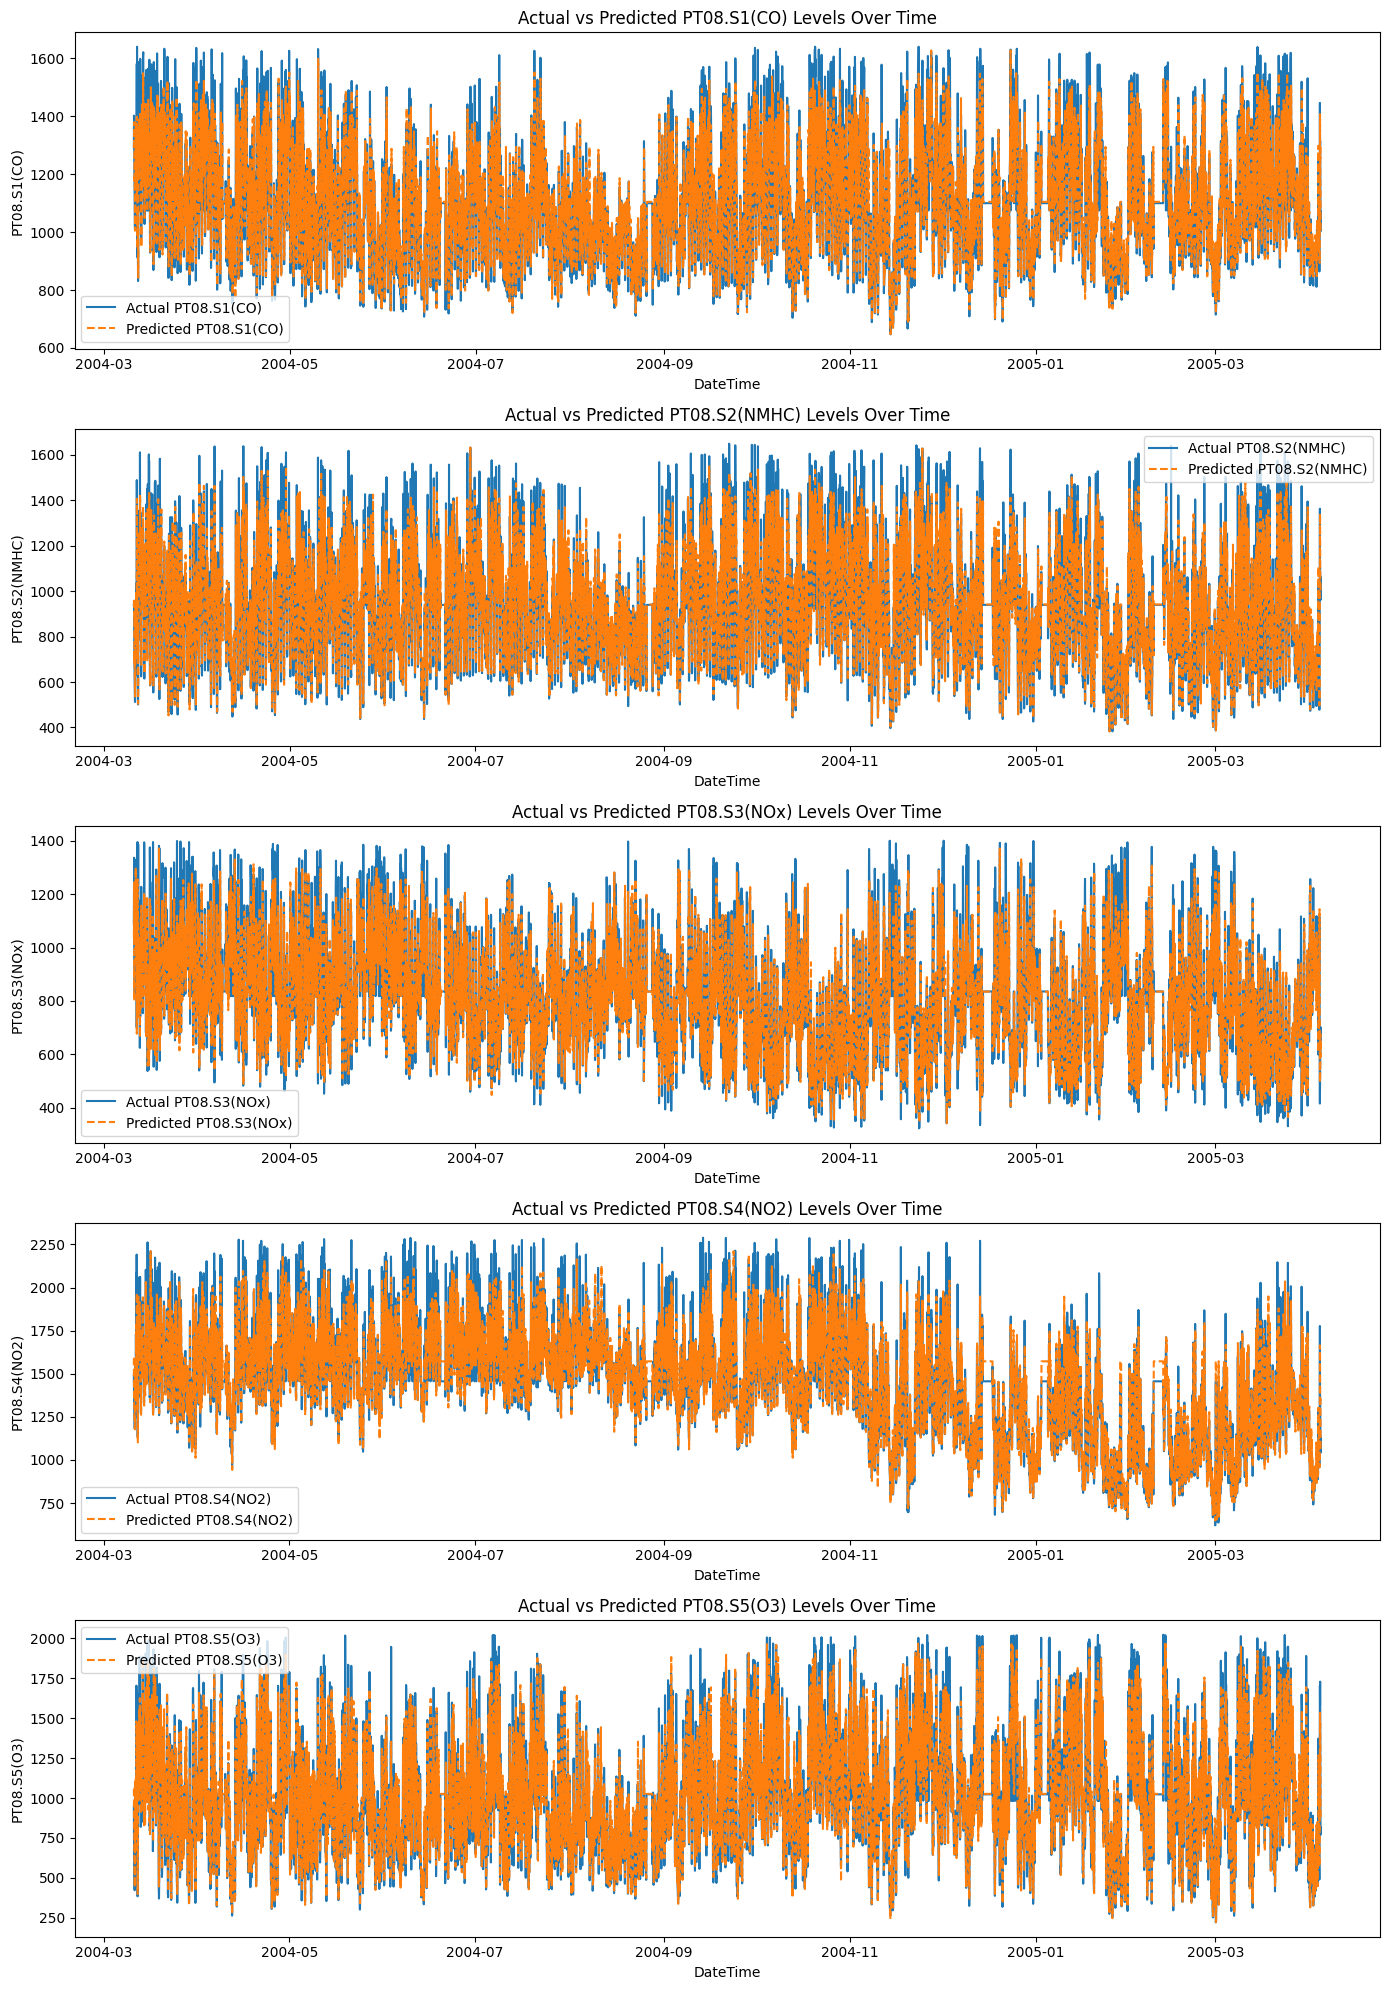

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
file_path = 'clean.csv'  
data = pd.read_csv(file_path)

# Ensure the DateTime column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sort the data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Set the DateTime column as the index
data.set_index('DateTime', inplace=True)

# List of pollutants to model
pollutants = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Dictionary to store results
results_dict = {}

# Function to train and predict using linear regression
def train_and_predict(pollutant):
    data[f'{pollutant}_lagged'] = data[pollutant].shift(1)
    data.dropna(inplace=True)
    
    X = data[f'{pollutant}_lagged'].values.reshape(-1, 1)
    y = data[pollutant].values

    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X)

    results = pd.DataFrame({
        'DateTime': data.index,
        f'Actual_{pollutant}': y,
        f'Predicted_{pollutant}': y_pred
    })
    
    return results

# Train and predict for each pollutant
for pollutant in pollutants:
    results_dict[pollutant] = train_and_predict(pollutant)

# Combine results into a single DataFrame
combined_results = pd.DataFrame({'DateTime': data.index})

for pollutant in pollutants:
    combined_results = combined_results.join(results_dict[pollutant].set_index('DateTime'), on='DateTime', how='outer')

# Save the combined results to a CSV file
output_file_path = 'predicted_pollutants.csv'
combined_results.to_csv(output_file_path, index=False)

# Display the first few rows of the combined results DataFrame
print(combined_results.head())

# Plot the actual data, predictions, and errors for each pollutant
plt.figure(figsize=(14, 20))
for i, pollutant in enumerate(pollutants, 1):
    results = results_dict[pollutant]
    
    # Plot actual vs predicted
    plt.subplot(len(pollutants) , 1, i)
    plt.plot(results['DateTime'], results[f'Actual_{pollutant}'], label=f'Actual {pollutant}')
    plt.plot(results['DateTime'], results[f'Predicted_{pollutant}'], label=f'Predicted {pollutant}', linestyle='--')
    plt.xlabel('DateTime')
    plt.ylabel(pollutant)
    plt.title(f'Actual vs Predicted {pollutant} Levels Over Time')
    plt.legend()


plt.tight_layout()
plt.show()


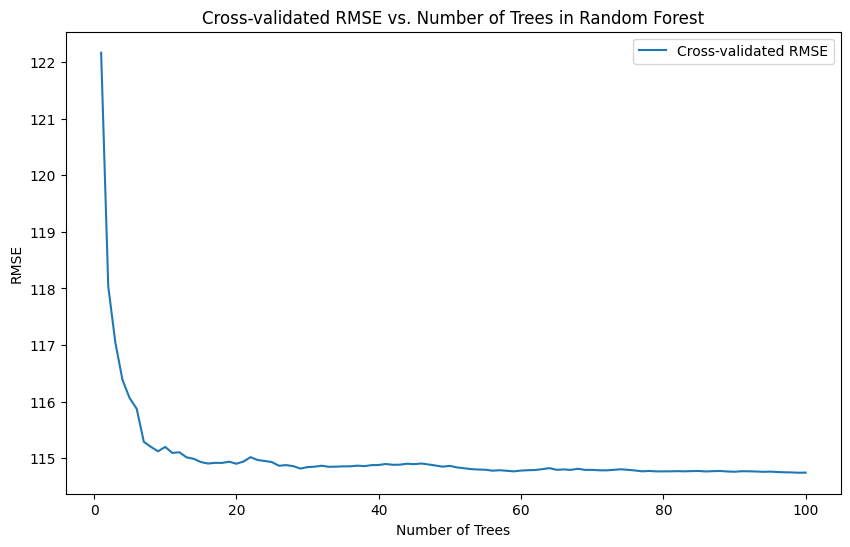

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

# Load the data
file_path = 'clean.csv'
data = pd.read_csv(file_path)

# Ensure the DateTime column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sort the data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Set the DateTime column as the index
data.set_index('DateTime', inplace=True)

# Select a pollutant to predict (e.g., NOx)
pollutant = 'PT08.S3(NOx)'

# Create a lagged feature for the selected pollutant
data[f'{pollutant}_lagged'] = data[pollutant].shift(1)
data.dropna(inplace=True)

# Define input feature (lagged pollutant) and output target (current pollutant)
X = data[f'{pollutant}_lagged'].values.reshape(-1, 1)
y = data[pollutant].values

# Define the number of folds for cross-validation
n_splits = 5

# Initialize KFold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Train a Random Forest model with cross-validation and record RMSE
n_estimators = 100
rmse_cv = []

for i in range(1, n_estimators + 1):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    # Calculate cross-validated RMSE for each number of trees
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_cv.append(np.sqrt(-cv_scores.mean()))

# Plot RMSE against the number of trees
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_estimators + 1), rmse_cv, label='Cross-validated RMSE')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.title('Cross-validated RMSE vs. Number of Trees in Random Forest')
plt.legend()
plt.show()


In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd
import matplotlib.pyplot as plt


In [97]:
file_path = '/content/drive/My Drive/Colab Notebooks/milan_oxides.csv'
data_clean_actual = pd.read_csv(file_path)

In [98]:
file_path = '/content/drive/My Drive/Colab Notebooks/predicted_pollutants.csv'
data_clean_predictied = pd.read_csv(file_path)

In [99]:
data_clean_predictied

,DateTime,Actual_PT08.S1(CO),Predicted_PT08.S1(CO),Actual_PT08.S2(NMHC),Predicted_PT08.S2(NMHC),Actual_PT08.S3(NOx),Predicted_PT08.S3(NOx),Actual_PT08.S4(NO2),Predicted_PT08.S4(NO2),Actual_PT08.S5(O3),Predicted_PT08.S5(O3)
0,2005-01-16 15:00:00,833.0,843.970000,584.0,651.750000,1144.0,1064.910000,821.0,878.590000,463.0,610.280000
1,2005-01-16 16:00:00,877.0,801.430000,642.0,556.050000,1037.0,1083.760000,859.0,857.670000,565.0,481.570000
2,2005-01-16 17:00:00,892.0,851.850000,668.0,645.960000,1017.0,1062.980000,872.0,882.490000,632.0,587.140000
3,2005-01-16 18:00:00,899.0,885.070000,674.0,714.460000,1002.0,988.930000,893.0,931.130000,691.0,679.410000
4,2005-01-16 19:00:00,1008.0,876.610000,861.0,684.930000,839.0,971.580000,977.0,926.240000,943.0,699.880000
...,...,...,...,...,...,...,...,...,...,...,...
1867,2005-04-04 10:00:00,1314.0,1303.578332,1101.0,1091.331534,539.0,586.624936,1374.0,1400.125292,1729.0,1445.939061
1868,2005-04-04 11:00:00,1163.0,1331.004995,1027.0,1080.604601,604.0,585.434808,1264.0,1372.727938,1269.0,1585.277184
1869,2005-04-04 12:00:00,1142.0,1195.490000,1063.0,1028.760000,603.0,644.990000,1241.0,1299.390000,1092.0,1289.890000
1870,2005-04-04 13:00:00,1003.0,1190.770000,961.0,1097.910000,702.0,640.930000,1041.0,1401.370000,770.0,1188.580000


In [100]:
file_path = '/content/drive/My Drive/Colab Notebooks/aqi_data.csv'
aqi_data = pd.read_csv(file_path)

In [125]:
aqi_data.tail()

,Start,AQI_CO,AQI_NO2,AQI_O3,AQI_PM10,AQI_PM25,AQI_SO2,Overall_AQI,Overall_AQI_Smoothed
10028,2005-04-29 20:00:00,7.528409,21.260870,21.412037,7.867615,20.992378,12.857143,67.175608,81.827631
10029,2005-04-29 21:00:00,7.244318,21.615942,21.498843,7.867615,20.992378,10.714286,67.175608,80.992557
10030,2005-04-29 22:00:00,6.960227,21.615942,20.543981,7.867615,20.992378,10.714286,67.175608,79.846794
10031,2005-04-29 23:00:00,6.960227,24.101449,18.576389,7.867615,20.992378,10.714286,72.304348,78.651142
10032,2005-04-30 00:00:00,7.386364,24.101449,16.203704,7.550705,20.800697,10.714286,72.304348,77.630309


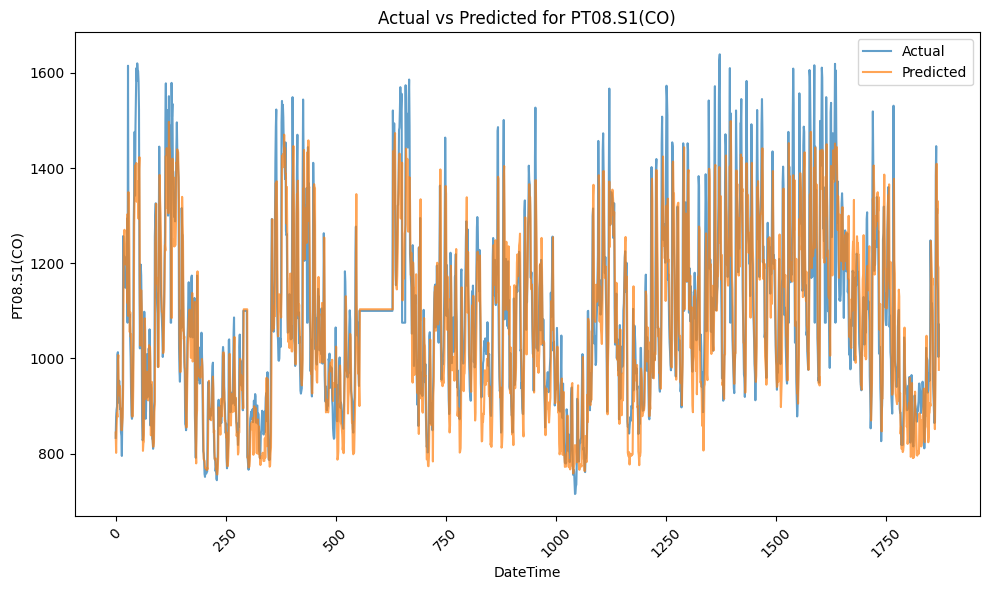

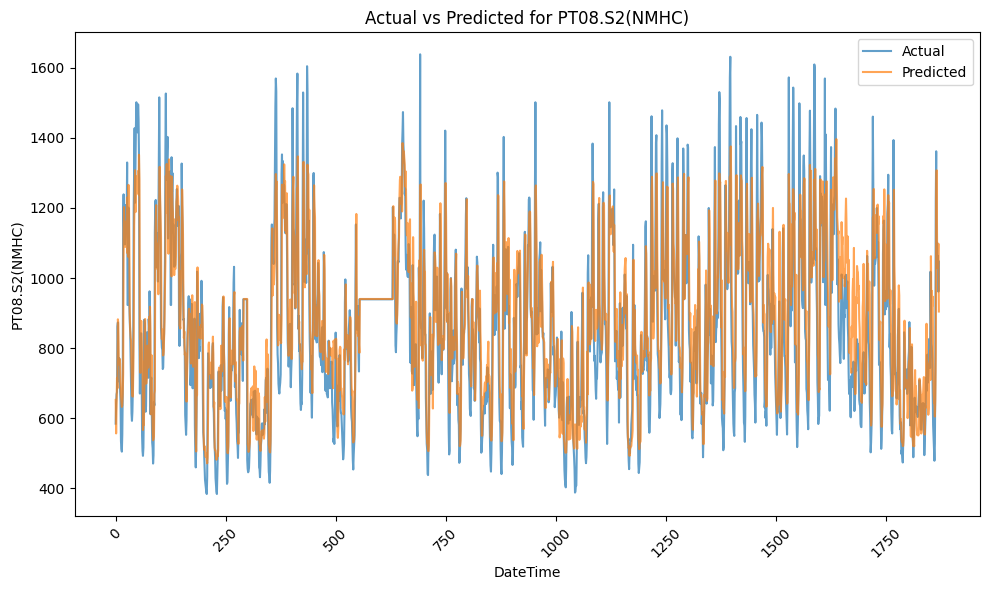

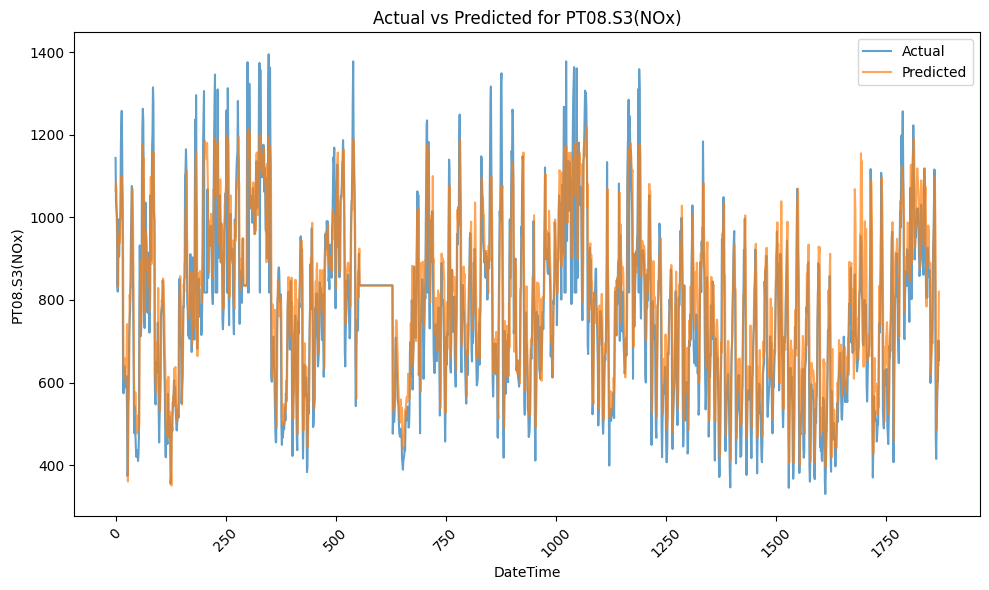

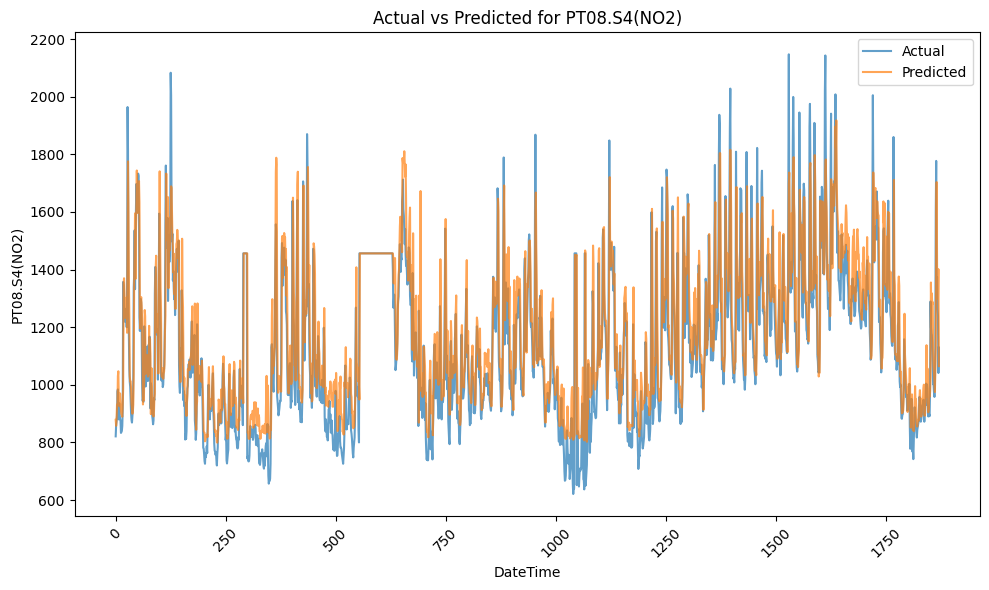

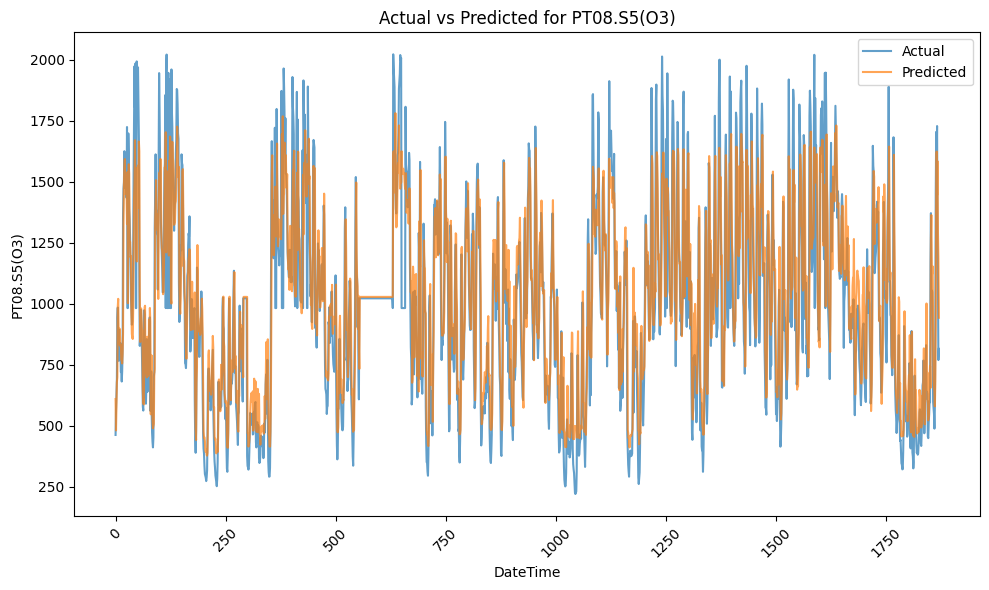

In [102]:

# Define the columns for pollutants
pollutants = [
    'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
    'PT08.S4(NO2)', 'PT08.S5(O3)'
]

# Plot actual vs predicted for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    plt.plot(data_clean_predictied.index, data_clean_predictied[f'Actual_{pollutant}'], label='Actual', alpha=0.7)
    plt.plot(data_clean_predictied.index, data_clean_predictied[f'Predicted_{pollutant}'], label='Predicted', alpha=0.7)
    plt.xlabel('DateTime')
    plt.ylabel(pollutant)
    plt.title(f'Actual vs Predicted for {pollutant}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [103]:
data_clean_actual['PT08.S1(CO)'] = data_clean_actual['PT08.S1(CO)'] * 0.01
data_clean_actual['PT08.S2(NMHC)'] = data_clean_actual['PT08.S2(NMHC)'] * 0.01
data_clean_actual['PT08.S3(NOx)'] = data_clean_actual['PT08.S3(NOx)'] * 0.01
data_clean_actual['PT08.S4(NO2)'] = data_clean_actual['PT08.S4(NO2)'] * 0.01
data_clean_actual['PT08.S5(O3)'] = data_clean_actual['PT08.S5(O3)'] * 0.01
data_clean_actual

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Season
0,13.60,10.46,10.56,16.92,12.68,13.6,48.9,0.7578,2004-03-10 18:00:00,winter
1,12.92,9.55,11.74,15.59,9.72,13.3,47.7,0.7255,2004-03-10 19:00:00,winter
2,14.02,9.39,11.40,15.55,10.74,11.9,54.0,0.7502,2004-03-10 20:00:00,winter
3,13.76,9.48,10.92,15.84,12.03,11.0,60.0,0.7867,2004-03-10 21:00:00,winter
4,12.72,8.36,12.05,14.90,11.10,11.2,59.6,0.7888,2004-03-10 22:00:00,winter
...,...,...,...,...,...,...,...,...,...,...
9352,13.14,11.01,5.39,13.74,17.29,21.9,29.3,0.7568,2005-04-04 10:00:00,spring
9353,11.63,10.27,6.04,12.64,12.69,24.3,23.7,0.7119,2005-04-04 11:00:00,spring
9354,11.42,10.63,6.03,12.41,10.92,26.9,18.3,0.6406,2005-04-04 12:00:00,spring
9355,10.03,9.61,7.02,10.41,7.70,28.3,13.5,0.5139,2005-04-04 13:00:00,spring


In [104]:
aqi_data['AQI_NO2'] = aqi_data['AQI_NO2'] / 3
aqi_data['AQI_O3'] = aqi_data['AQI_O3'] / 2
aqi_data['AQI_PM25'] = aqi_data['AQI_PM25'] / 3.2
aqi_data['AQI_SO2'] = aqi_data['AQI_SO2'] * 1.5
aqi_data['AQI_PM10'] = aqi_data['AQI_PM10'] / 2.8
aqi_data.head()

,Start,AQI_CO,AQI_NO2,AQI_O3,AQI_PM10,AQI_PM25,AQI_SO2,Overall_AQI,Overall_AQI_Smoothed
0,2004-03-01 00:00:00,19.318182,20.195652,4.979817,20.335498,21.786481,12.857143,69.716738,NaN
1,2004-03-01 01:00:00,18.181818,17.355072,4.979817,20.335498,21.786481,0.000000,69.716738,NaN
2,2004-03-01 02:00:00,17.803030,14.465409,4.979817,20.335498,21.786481,10.714286,69.716738,NaN
3,2004-03-01 03:00:00,17.329546,11.320755,4.979817,20.335498,21.786481,0.000000,69.716738,NaN
4,2004-03-01 04:00:00,17.045455,12.264151,4.979817,20.335498,21.786481,0.000000,69.716738,NaN


In [105]:
combined_data = pd.merge(data_clean_actual, aqi_data, left_index=True, right_index=True)


In [106]:
columns_to_drop = ['Overall_AQI_Smoothed', 'DateTime', 'Season', 'Start']
combined_data = combined_data.drop(columns=columns_to_drop, errors='ignore')

In [107]:
combined_data_interpolated = combined_data.interpolate(method='linear', limit_direction='forward')


In [108]:
nan_values = combined_data_interpolated.isna().sum()
print(nan_values)

PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
AQI_CO           0
AQI_NO2          0
AQI_O3           0
AQI_PM10         0
AQI_PM25         0
AQI_SO2          0
Overall_AQI      0
dtype: int64


In [109]:
combined_data_interpolated['Mean_Feature'] = combined_data_interpolated[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'AQI_CO', 'AQI_NO2', 'AQI_O3', 'AQI_PM10',	'AQI_PM25',	'AQI_SO2','Overall_AQI']].mean(axis=1)


In [110]:
combined_data_interpolated['Median_Feature'] = combined_data_interpolated[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'AQI_CO', 'AQI_NO2', 'AQI_O3', 'AQI_PM10',	'AQI_PM25',	'AQI_SO2','Overall_AQI']].median(axis=1)


In [111]:
combined_data_interpolated

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,AQI_CO,AQI_NO2,AQI_O3,AQI_PM10,AQI_PM25,AQI_SO2,Overall_AQI,Mean_Feature,Median_Feature
0,13.60,10.46,10.56,16.92,12.68,13.6,48.9,0.7578,19.318182,20.195652,4.979817,20.335498,21.786481,12.857143,69.716738,19.450793,15.260000
1,12.92,9.55,11.74,15.59,9.72,13.3,47.7,0.7255,18.181818,17.355072,4.979817,20.335498,21.786481,0.000000,69.716738,17.656285,14.255000
2,14.02,9.39,11.40,15.55,10.74,11.9,54.0,0.7502,17.803030,14.465409,4.979817,20.335498,21.786481,10.714286,69.716738,18.408438,14.242704
3,13.76,9.48,10.92,15.84,12.03,11.0,60.0,0.7867,17.329546,11.320755,4.979817,20.335498,21.786481,0.000000,69.716738,17.291570,12.895000
4,12.72,8.36,12.05,14.90,11.10,11.2,59.6,0.7888,17.045455,12.264151,4.979817,20.335498,21.786481,0.000000,69.716738,17.104845,12.492075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,13.14,11.01,5.39,13.74,17.29,21.9,29.3,0.7568,6.818182,6.918239,11.458333,22.331500,38.231260,32.142857,122.340034,25.067534,13.440000
9353,11.63,10.27,6.04,12.64,12.69,24.3,23.7,0.7119,6.676136,10.691824,13.223380,22.331500,38.231260,34.285714,122.340034,25.087487,12.665000
9354,11.42,10.63,6.03,12.41,10.92,26.9,18.3,0.6406,6.534091,15.408805,14.351852,22.331500,38.231260,30.000000,122.340034,25.050628,13.380926
9355,10.03,9.61,7.02,10.41,7.70,28.3,13.5,0.5139,6.676136,18.775362,14.496528,22.331500,38.231260,27.857143,122.340034,24.623164,12.453264


In [112]:
data_clean_predictied

,DateTime,Actual_PT08.S1(CO),Predicted_PT08.S1(CO),Actual_PT08.S2(NMHC),Predicted_PT08.S2(NMHC),Actual_PT08.S3(NOx),Predicted_PT08.S3(NOx),Actual_PT08.S4(NO2),Predicted_PT08.S4(NO2),Actual_PT08.S5(O3),Predicted_PT08.S5(O3)
0,2005-01-16 15:00:00,833.0,843.970000,584.0,651.750000,1144.0,1064.910000,821.0,878.590000,463.0,610.280000
1,2005-01-16 16:00:00,877.0,801.430000,642.0,556.050000,1037.0,1083.760000,859.0,857.670000,565.0,481.570000
2,2005-01-16 17:00:00,892.0,851.850000,668.0,645.960000,1017.0,1062.980000,872.0,882.490000,632.0,587.140000
3,2005-01-16 18:00:00,899.0,885.070000,674.0,714.460000,1002.0,988.930000,893.0,931.130000,691.0,679.410000
4,2005-01-16 19:00:00,1008.0,876.610000,861.0,684.930000,839.0,971.580000,977.0,926.240000,943.0,699.880000
...,...,...,...,...,...,...,...,...,...,...,...
1867,2005-04-04 10:00:00,1314.0,1303.578332,1101.0,1091.331534,539.0,586.624936,1374.0,1400.125292,1729.0,1445.939061
1868,2005-04-04 11:00:00,1163.0,1331.004995,1027.0,1080.604601,604.0,585.434808,1264.0,1372.727938,1269.0,1585.277184
1869,2005-04-04 12:00:00,1142.0,1195.490000,1063.0,1028.760000,603.0,644.990000,1241.0,1299.390000,1092.0,1289.890000
1870,2005-04-04 13:00:00,1003.0,1190.770000,961.0,1097.910000,702.0,640.930000,1041.0,1401.370000,770.0,1188.580000


In [113]:
columns_to_drop = ['Actual_PT08.S1(CO)', 'DateTime', 'Actual_PT08.S2(NMHC)', 'Actual_PT08.S3(NOx)','Actual_PT08.S4(NO2)', 'Actual_PT08.S5(O3)']

In [114]:
data_clean_predictied = data_clean_predictied.drop(columns=columns_to_drop, errors='ignore')

In [115]:
data_clean_predictied

,Predicted_PT08.S1(CO),Predicted_PT08.S2(NMHC),Predicted_PT08.S3(NOx),Predicted_PT08.S4(NO2),Predicted_PT08.S5(O3)
0,843.970000,651.750000,1064.910000,878.590000,610.280000
1,801.430000,556.050000,1083.760000,857.670000,481.570000
2,851.850000,645.960000,1062.980000,882.490000,587.140000
3,885.070000,714.460000,988.930000,931.130000,679.410000
4,876.610000,684.930000,971.580000,926.240000,699.880000
...,...,...,...,...,...
1867,1303.578332,1091.331534,586.624936,1400.125292,1445.939061
1868,1331.004995,1080.604601,585.434808,1372.727938,1585.277184
1869,1195.490000,1028.760000,644.990000,1299.390000,1289.890000
1870,1190.770000,1097.910000,640.930000,1401.370000,1188.580000


In [116]:
data_clean_predictied['Predicted_PT08.S1(CO)'] = data_clean_predictied['Predicted_PT08.S1(CO)'] * 0.01
data_clean_predictied['Predicted_PT08.S2(NMHC)'] = data_clean_predictied['Predicted_PT08.S2(NMHC)'] * 0.01
data_clean_predictied['Predicted_PT08.S3(NOx)'] = data_clean_predictied['Predicted_PT08.S3(NOx)'] * 0.01
data_clean_predictied['Predicted_PT08.S4(NO2)'] = data_clean_predictied['Predicted_PT08.S4(NO2)'] * 0.01
data_clean_predictied['Predicted_PT08.S5(O3)'] = data_clean_predictied['Predicted_PT08.S5(O3)'] * 0.01
data_clean_predictied

,Predicted_PT08.S1(CO),Predicted_PT08.S2(NMHC),Predicted_PT08.S3(NOx),Predicted_PT08.S4(NO2),Predicted_PT08.S5(O3)
0,8.439700,6.517500,10.649100,8.785900,6.102800
1,8.014300,5.560500,10.837600,8.576700,4.815700
2,8.518500,6.459600,10.629800,8.824900,5.871400
3,8.850700,7.144600,9.889300,9.311300,6.794100
4,8.766100,6.849300,9.715800,9.262400,6.998800
...,...,...,...,...,...
1867,13.035783,10.913315,5.866249,14.001253,14.459391
1868,13.310050,10.806046,5.854348,13.727279,15.852772
1869,11.954900,10.287600,6.449900,12.993900,12.898900
1870,11.907700,10.979100,6.409300,14.013700,11.885800


In [117]:
combined_data_predicted = pd.merge(data_clean_predictied, aqi_data, left_index=True, right_index=True)


In [118]:
columns_to_drop = ['Overall_AQI_Smoothed', 'DateTime', 'Season', 'Start']
combined_data_predicted = combined_data_predicted.drop(columns=columns_to_drop, errors='ignore')

In [119]:
combined_data_predicted_interpolated = combined_data_predicted.interpolate(method='linear', limit_direction='forward')


In [120]:
combined_data_predicted_interpolated['Mean_Feature'] = combined_data_predicted_interpolated[['Predicted_PT08.S1(CO)', 'Predicted_PT08.S2(NMHC)', 'Predicted_PT08.S3(NOx)', 'Predicted_PT08.S4(NO2)', 'Predicted_PT08.S5(O3)', 'AQI_CO', 'AQI_NO2', 'AQI_O3', 'AQI_PM10',	'AQI_PM25',	'AQI_SO2','Overall_AQI']].mean(axis=1)
combined_data_predicted_interpolated['Median_Feature'] = combined_data_predicted_interpolated[['Predicted_PT08.S1(CO)', 'Predicted_PT08.S2(NMHC)', 'Predicted_PT08.S3(NOx)', 'Predicted_PT08.S4(NO2)', 'Predicted_PT08.S5(O3)', 'AQI_CO', 'AQI_NO2', 'AQI_O3', 'AQI_PM10',	'AQI_PM25',	'AQI_SO2','Overall_AQI']].median(axis=1)


In [121]:
combined_data_predicted_interpolated

,Predicted_PT08.S1(CO),Predicted_PT08.S2(NMHC),Predicted_PT08.S3(NOx),Predicted_PT08.S4(NO2),Predicted_PT08.S5(O3),AQI_CO,AQI_NO2,AQI_O3,AQI_PM10,AQI_PM25,AQI_SO2,Overall_AQI,Mean_Feature,Median_Feature
0,8.439700,6.517500,10.649100,8.785900,6.102800,19.318182,20.195652,4.979817,20.335498,21.786481,12.857143,69.716738,17.473709,11.753121
1,8.014300,5.560500,10.837600,8.576700,4.815700,18.181818,17.355072,4.979817,20.335498,21.786481,0.000000,69.716738,15.846685,9.707150
2,8.518500,6.459600,10.629800,8.824900,5.871400,17.803030,14.465409,4.979817,20.335498,21.786481,10.714286,69.716738,16.675455,10.672043
3,8.850700,7.144600,9.889300,9.311300,6.794100,17.329546,11.320755,4.979817,20.335498,21.786481,0.000000,69.716738,15.621570,9.600300
4,8.766100,6.849300,9.715800,9.262400,6.998800,17.045455,12.264151,4.979817,20.335498,21.786481,0.000000,69.716738,15.643378,9.489100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,13.035783,10.913315,5.866249,14.001253,14.459391,9.375000,24.811594,4.979817,9.617504,18.144559,10.714286,74.434783,17.529461,11.974549
1868,13.310050,10.806046,5.854348,13.727279,15.852772,9.801136,30.492754,4.979817,9.617504,18.144559,4.285714,91.478261,19.029187,12.058048
1869,11.954900,10.287600,6.449900,12.993900,12.898900,10.653409,32.623188,4.979817,9.617504,18.144559,17.142857,97.869565,20.468008,12.426900
1870,11.907700,10.979100,6.409300,14.013700,11.885800,11.505682,26.586957,4.979817,9.617504,18.144559,15.000000,79.760870,18.399249,11.896750


In [122]:
combined_data_interpolated

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,AQI_CO,AQI_NO2,AQI_O3,AQI_PM10,AQI_PM25,AQI_SO2,Overall_AQI,Mean_Feature,Median_Feature
0,13.60,10.46,10.56,16.92,12.68,13.6,48.9,0.7578,19.318182,20.195652,4.979817,20.335498,21.786481,12.857143,69.716738,19.450793,15.260000
1,12.92,9.55,11.74,15.59,9.72,13.3,47.7,0.7255,18.181818,17.355072,4.979817,20.335498,21.786481,0.000000,69.716738,17.656285,14.255000
2,14.02,9.39,11.40,15.55,10.74,11.9,54.0,0.7502,17.803030,14.465409,4.979817,20.335498,21.786481,10.714286,69.716738,18.408438,14.242704
3,13.76,9.48,10.92,15.84,12.03,11.0,60.0,0.7867,17.329546,11.320755,4.979817,20.335498,21.786481,0.000000,69.716738,17.291570,12.895000
4,12.72,8.36,12.05,14.90,11.10,11.2,59.6,0.7888,17.045455,12.264151,4.979817,20.335498,21.786481,0.000000,69.716738,17.104845,12.492075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,13.14,11.01,5.39,13.74,17.29,21.9,29.3,0.7568,6.818182,6.918239,11.458333,22.331500,38.231260,32.142857,122.340034,25.067534,13.440000
9353,11.63,10.27,6.04,12.64,12.69,24.3,23.7,0.7119,6.676136,10.691824,13.223380,22.331500,38.231260,34.285714,122.340034,25.087487,12.665000
9354,11.42,10.63,6.03,12.41,10.92,26.9,18.3,0.6406,6.534091,15.408805,14.351852,22.331500,38.231260,30.000000,122.340034,25.050628,13.380926
9355,10.03,9.61,7.02,10.41,7.70,28.3,13.5,0.5139,6.676136,18.775362,14.496528,22.331500,38.231260,27.857143,122.340034,24.623164,12.453264


In [123]:
combined_data_interpolated_avg = combined_data_interpolated.groupby(combined_data_interpolated.index // 5).mean()

combined_data_interpolated_avg.shape

(1872, 17)

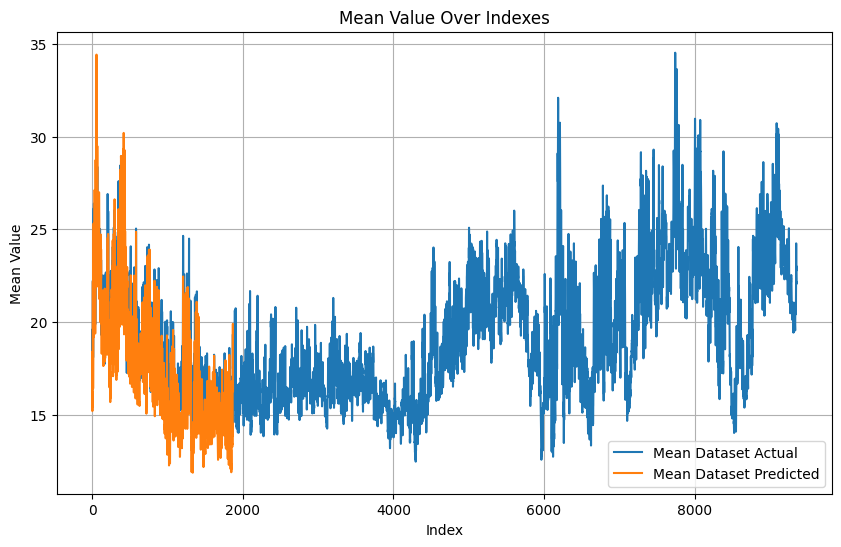

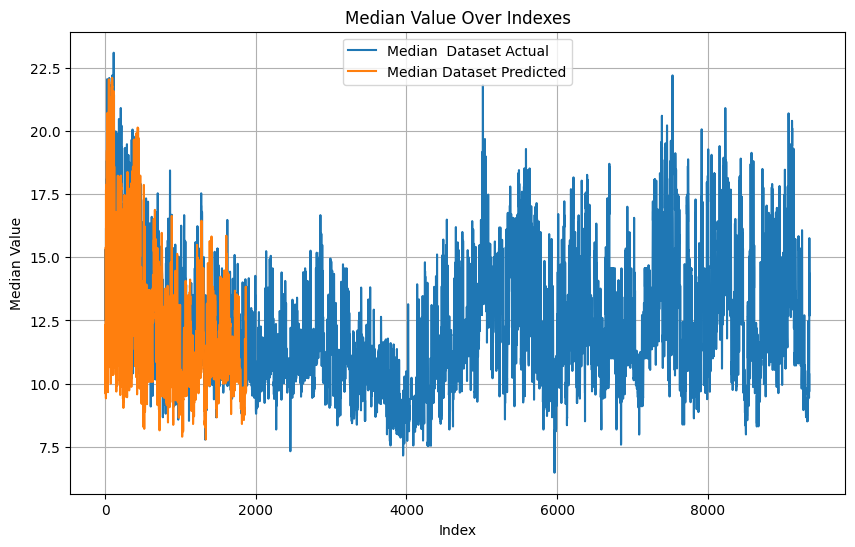

In [124]:
mean_values = combined_data_interpolated.mean(axis=1)
median_values = combined_data_interpolated.median(axis=1)

mean_values_predicted = combined_data_predicted_interpolated.mean(axis=1)
median_values_predicted = combined_data_predicted_interpolated.median(axis=1)


plt.figure(figsize=(10, 6))

plt.plot(mean_values, label='Mean Dataset Actual')
plt.plot(mean_values_predicted, label='Mean Dataset Predicted', linestyle='-')

plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.title('Mean Value Over Indexes')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(median_values, label='Median  Dataset Actual')
plt.plot(median_values_predicted, label='Median Dataset Predicted', linestyle='-')


plt.xlabel('Index')
plt.ylabel('Median Value')
plt.title('Median Value Over Indexes')
plt.legend()
plt.grid(True)
plt.show()